## DBSCAN Practice

We're familiar with DBSCAN. Now, let's practice it!

Let's work with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

## Load our data

Feel free to also do basic EDA. At least check the head()!

In [3]:
nhl = pd.read_csv('https://raw.githubusercontent.com/josephnelson93/GA-DSI/master/NHL_Data_GA.csv')
nhl.head()
# What kind of github username is that anyways?

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


## Set up our X

Let's cluster on all features EXCEPT team and rank.

(Bonus idea: make rank be our y category if we want to engage in additional clustering evaluation.)

In [4]:
# first, check out dtypes
print nhl.dtypes # TOI is an object - let's parse it

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object


In [5]:
# grab the first four digits, make them an integer
nhl.TOI = nhl.TOI.apply(lambda x: x.split(':')[0])

In [6]:
# now make it an int (or to_numeric)
nhl.TOI = nhl.TOI.apply(lambda x: int(x))

In [7]:
print nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI       int64
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object


In [8]:
X = nhl.drop(['Team', 'Rank', 'PTS'], axis=1)
# print X.head()
y = nhl.Rank
# print y

## Scatter plot EDA

Check two scatter plots. Make at least one of them be points vs GF. Do we obtain a general idea of how many clusters we should witness?

In [9]:
# remember columns we can plot
print X.columns

Index([u'TOI', u'GF', u'GA', u'GF60', u'GA60', u'GF%', u'SF', u'SA', u'SF60',
       u'SA60', u'SF%', u'FF', u'FA', u'FF60', u'FA60', u'FF%', u'CF', u'CA',
       u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%', u'PDO', u'PIM'],
      dtype='object')


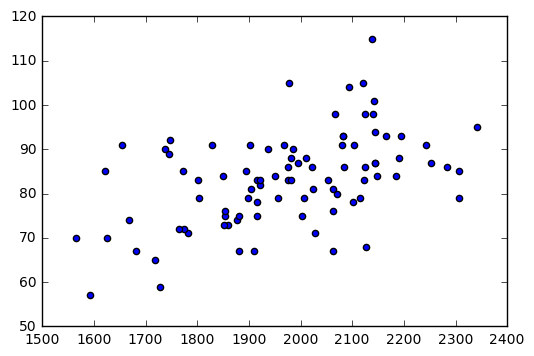

In [10]:
%matplotlib inline
# import matplotlib.pyplot as plt
#X.plot(kind='scatter', x='CF', y='GF') # pandas way, labeled axes
plt.scatter(X['CF'], X['GF'])

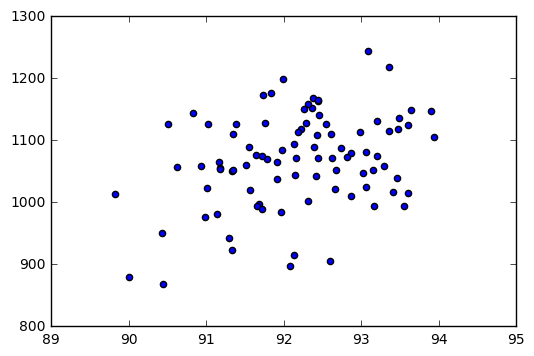

In [11]:
plt.scatter(X['Sv%'], X['SA'])

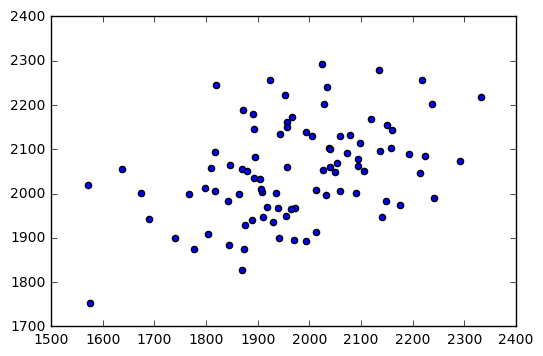

In [12]:
plt.scatter(X['CA'], X['TOI'])

## Scale our data

Who does a DBSCAN on unscaled data?! Savages. That's who.

In [13]:
X = StandardScaler().fit_transform(X)

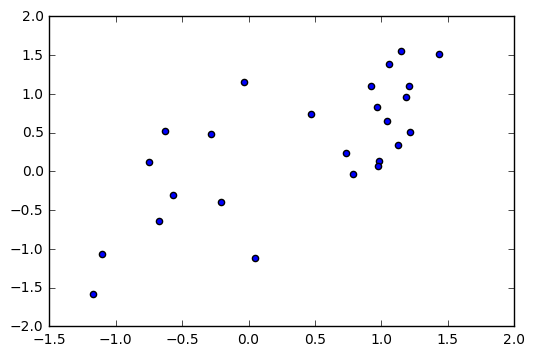

In [14]:
plt.scatter(X[1], X[2])

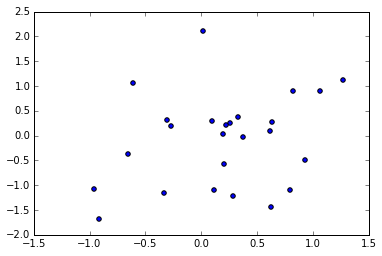

In [77]:
plt.scatter(X[4], X[5])

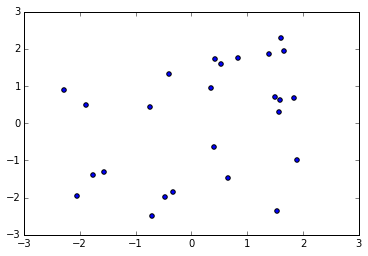

In [78]:
plt.scatter(X[6], X[7])

## Instatiate our DBSCAN cluster

Remember to pass an epsilon and min_points of your choice.

In [15]:
from sklearn.cluster import DBSCAN

dbscn = DBSCAN(eps = 3, min_samples = 3).fit(X)

# 'eps' is the max distance between two samples in order for them to be considered in the some cluster.
# min_samples = Minimum number of samples required for a cluster to be considered a cluster.

## Store our labels

Using the `.labels_` command on our DBSCAN class

In [16]:
labels = dbscn.labels_  
print(labels) # comprehension: what do these mean? How many are there?
# Observations that did not make it into a DB qualified cluster will recieve the label of -1

[ 0  0  0 -1  0 -1 -1 -1 -1  0  0  0 -1 -1  1 -1 -1 -1  0  0 -1  0 -1 -1 -1
 -1 -1  0  0 -1  0  0  0 -1  0  0  0  0  2 -1 -1  0  0 -1  0  0 -1 -1 -1  0
  0 -1 -1 -1  0  0 -1  0  3  0 -1 -1 -1  3 -1  0 -1 -1  4 -1 -1  3  3  0  2
  2  1  0 -1  1 -1  0  2  2  4  0  0  0  4 -1]


In [20]:
# how many clusters do we have?
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

5


## Evaluate our cluster!

Let's check the silhouette score. As a bonus, if you set our y as rank, check out the homogenity, completeness, and v-measure. For the adventurous, see how you can adjust our epsilon and min_points to improve these.

In [17]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: -0.012


In [21]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Estimated number of clusters: 5
Homogeneity: 0.118
Completeness: 0.103
V-measure: 0.110


In [22]:
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 
print(core_samples)

[False  True  True False  True False False False False  True  True False
 False False  True False False False False  True False  True False False
 False False False  True  True False False False  True False  True  True
  True False  True False False  True  True False False  True False False
 False  True  True False False False  True  True False  True  True  True
 False False False  True False  True False False  True False False False
  True False  True False  True  True False  True False False False  True
  True  True  True  True  True False]


## Optional: plot our clusters

Let's do this just like we did with the iris dataset.

//anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


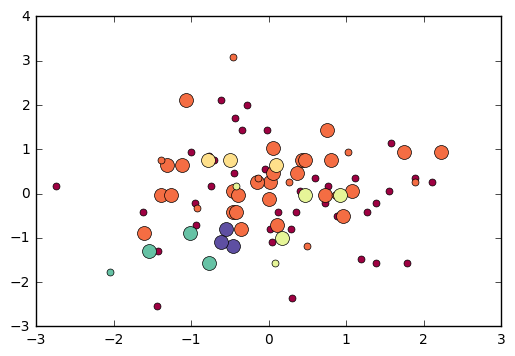

In [23]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)

## What did we learn?!

DBSCAN may be a poor choice for data that is densely populated in one area, yet distant from the rest of our data. Frustratingly, we can't find a good fit because of this! (We may have seen this coming in our scatter plots -- even after the data was scaled.) Perhaps, however, learning we have a number of data points are outside our typical clusters is just the insight we needed.

In these cases, we have observed a moment where the almighty DBSCAN doesn't provide tremendous insight.

For a picture of what is going on behind the scenes, use our handy DBSCAN visualization tool: www.naftaliharris.com/blog/visualizing-dbscan-clustering/, and select the "Packed Circles" example.

## Joseph, that game wasn't fun

Ok, fine. Let's use a good data set then :)

In [24]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

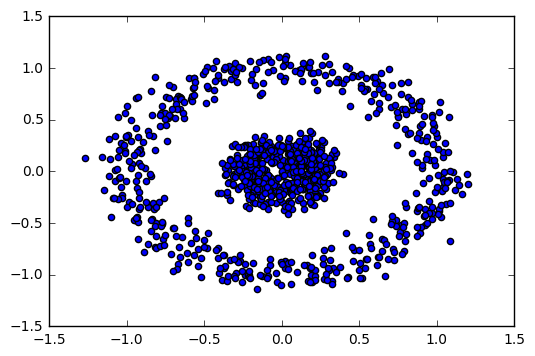

In [25]:
%matplotlib inline
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1])

In [26]:
X = StandardScaler().fit_transform(circles_X)

In [27]:
X.shape

(1000, 2)

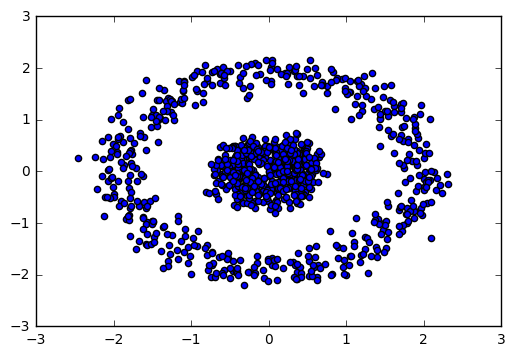

In [28]:
plt.scatter(X[:,0], X[:,1]) #how can we cluster this?!
# This is just me thinking out loud, but an RBF kernel for an SVM would be spot on.

In [33]:
dbscn = DBSCAN(eps = .5, min_samples = 3).fit(X)

In [34]:
labels = dbscn.labels_  
print(labels) # comprehension: what do these mean? How many are there?

[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0
 1 1 1 0 1 0 1 0 0 1 1 1 

i know that 00010100 = 20 in binary

In [35]:
# how many clusters do we have?
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

2


In [36]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.238


In [37]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(circles_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(circles_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(circles_y, labels))

Estimated number of clusters: 2
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


In [39]:
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 
print(core_samples)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

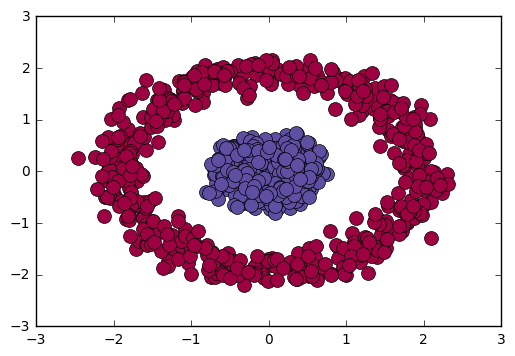

In [40]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)

## What did we learn, part 2?!

DBSCAN performs **exceptionally** well in this case! When we have anisotropicly or circularly plotted data, we should opt for DBSCAN because KMEANS has a number of assumptions (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html) that often don't pan out.

Hurray! Small wins!